# INITIALIZE

In [1]:
## include packages

using DelimitedFiles
using DCAUtils
using Plots
using FastaIO
using StatsBase
using Random
using MultivariateStats
using Statistics
using KitMSA
using PyPlot
using PyCall
using Distributions
#using NaNStatistics
using LaTeXStrings
using DataFrames
#using Suppressor
using CSV
using JLD2
import Genie: check_pca

@pyimport seaborn as sns
@pyimport numpy as np
@pyimport scipy.stats as stats
@pyimport matplotlib.colors as cols
@pyimport matplotlib.cm as mtcm
@pyimport matplotlib.ticker as tick


Precompiling Genie
        Info Given Genie was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Genie
[ Info: Precompiling Genie [54a25026-8a20-41b4-b67d-7241a2be3bfb]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Genie [54a25026-8a20-41b4-b67d-7241a2be3bfb].


In [4]:
function one_hot(msa::Array{Int8,2})
    M, N = size(msa)
    new_msa = zeros(M, N*21)
    for i in 1:M
        for j in 1:N
            index = msa[i,j]  
            new_msa[i, (j-1)*21 + index] = 1
        end
    end
    return new_msa
end

function one_hot(seq::Array{Int8,1})
    N = length(seq)
    new_msa = zeros(N*21)
    for j in 1:N
        index = seq[j]  
        new_msa[(j-1)*21 + index] = 1
    end
    return new_msa
end
    

one_hot (generic function with 2 methods)

# DATA

In [5]:
## read alignments from evolutionary trajectories
dbd_msa = DCAUtils.read_fasta_alignment("../../Gen.jl/data/alignments/natural/DBD_alignment.uniref90.cov80.a2m", 0.9);
@load "../../data_Genie/3_seqs_sim.jld2";
msas = [Int8.(res_all[i].step_msa[end]) for i in 1:3] ## good one is 180

3-element Vector{Matrix{Int8}}:
 [2 2 … 21 2; 10 14 … 9 3; … ; 15 9 … 15 21; 21 14 … 21 21]
 [2 2 … 21 2; 10 14 … 9 3; … ; 15 9 … 15 21; 21 14 … 21 21]
 [2 2 … 21 2; 10 14 … 9 3; … ; 15 9 … 15 21; 21 14 … 21 21]

In [10]:

## get PCA

# one hot encoding of natural alignment
one_hot_nat = one_hot(Int8.(dbd_msa'))
W_nat=DCAUtils.compute_weights(dbd_msa,0.2)[1]

# compute covariance of data
cov_nat = cov(one_hot_nat, pweights(W_nat))

# compute eigenvalues and eigenvectors of covariance matrix
eigenvecs_nat = eigvecs(cov_nat)
eigenvals_nat = eigvals(cov_nat)

# project natural data onto principal components
pc_nat = Float64.((eigenvecs_nat[:, [end, end-1]]'*one_hot_nat')')
;

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705


In [16]:
# compute pc along trajectory
pc_sils = [Array{Float64}(undef, 0, 2) for i in 1:3]
for i in 1:3
    one_hot_proj = one_hot(Int8.(msas[i]'))
    pc_sils[i] = Float64.((eigenvecs_nat[:, [end, end-1]]'*one_hot_proj')')
end



## FIG. 1C-D / 1S A

In [18]:
## contour = true produces figure 1C-D

contour = false
bw = 1.3

lw = 3.

fs_label = 22
fs_ax = 16
bw_exp = 0.65
fs_leg = 14
wt_size = 80
ext_l = 0.005
;



In [19]:
idxs = rand(1:size(dbd_msa,2),500);

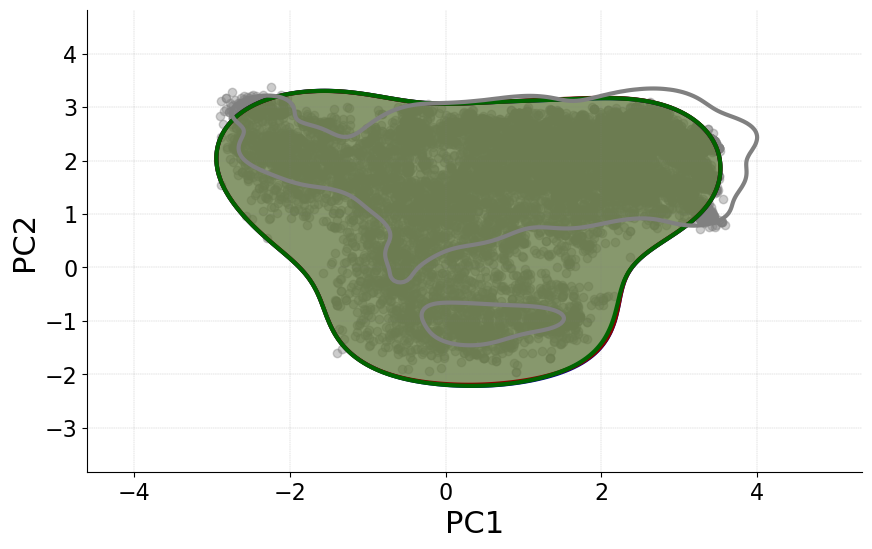

In [24]:
# define figure
#fig, (axd,) = plt.subplots(1, 1, figsize = (6, 8), dpi = 200)
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
shapex = 1
shapey = 1



axd = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)


########
## 1D ##
########
axd.spines["right"].set_visible(false)
axd.spines["top"].set_visible(false)
axd.set_xlabel("PC1", fontsize = fs_label)
axd.set_ylabel("PC2", fontsize = fs_label) 
#axd.set_ylim(-4.5, 2.5)
#axd.set_xlim(-5.5, 4.5)

    
sns.kdeplot(x=pc_nat[:, 1], y=pc_nat[:, 2], levels=[0.1, 1.], color = "grey", 
    linewidths = lw, fill = false,linestyles="-", label = "Natural sequences", 
    zorder = 7, bw_adjust = bw)
plt.scatter(pc_nat[:, 1], pc_nat[:, 2], color = "grey", alpha = 0.4)
sns.kdeplot(x=pc_sils[1][:, 1], y=pc_sils[1][:, 2], levels=[0.1, 1.], fill = true, 
    color = "blue", alpha = 0.4, bw_adjust = bw)
sns.kdeplot(x=pc_sils[1][:, 1], y=pc_sils[1][:, 2], levels=[0.1, 1.], fill = false, 
    linewidths = lw, color = "darkblue", bw_adjust = bw)
sns.kdeplot(x=pc_sils[2][:, 1], y=pc_sils[2][:, 2], levels=[0.1, 1.], fill = true, 
     color = "red", alpha = 0.4, bw_adjust = bw)
sns.kdeplot(x=pc_sils[2][:, 1], y=pc_sils[2][:, 2], levels=[0.1, 1.], fill = false, 
     linewidths = lw, color = "darkred", bw_adjust = bw)
sns.kdeplot(x=pc_sils[3][:, 1], y=pc_sils[3][:, 2], levels=[0.1, 1.], fill = true, 
    color = "green", alpha = 0.4, bw_adjust = bw)
sns.kdeplot(x=pc_sils[3][:, 1], y=pc_sils[3][:, 2], levels=[0.1, 1.], fill = false, 
    linewidths = lw, color = "darkgreen", bw_adjust = bw)
#axd.scatter(pc_wts[1,1], pc_wts[1,2], s = wt_size, marker = "x", color = "darkblue")
#axd.scatter(pc_wts[2,1], pc_wts[2,2], s = wt_size, marker = "x", color = "darkred")
#axd.scatter(pc_wts[3,1], pc_wts[3,2], s = wt_size, marker = "x", color = "darkgreen")

axd.tick_params(axis="both", which="major", labelsize=fs_ax)
axd.grid(color="grey", linestyle="--", alpha = 0.5, linewidth=0.3, zorder = 8)
#axd.legend(bbox_to_anchor=(0, 1), loc="upper left", 
#fontsize = fs_leg, columnspacing = 0.5, handletextpad = 0.1)
#plt.savefig("../prova_pca.pdf")